# Linear Regression from scratch, with Numpy

#### text about random dataset, using scikit-learn

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
X, y = datasets.make_regression(n_samples=800, n_features=1, noise=12, random_state=42)

In [3]:
X[:5], y[:5]

(array([[ 0.49191917],
        [-0.71284578],
        [ 0.88163976],
        [-0.78325329],
        [-1.1429703 ]]),
 array([ 22.30961167, -45.53705932,  36.63023583, -17.21001361,
        -37.50589764]))

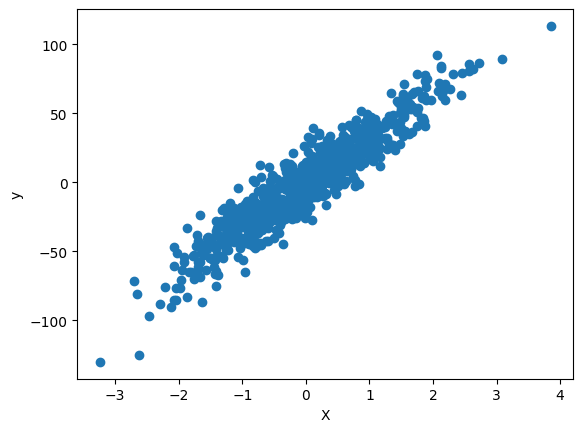

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### We want to find a line that best fits onto this data shown above.
So the general intuition is to plot a linear line, which is in the form of `y = m*X + b`.

- `X` is the dependent data
- `y` is the independent variable which is to be predicted
- `m` is the slope (I'll also call this as `w`, for weight) and `b` is the bias.

So we have the power to change `m` and `b`, since they are the model parameters. We will want to reduce these parameters to an optimal value which will reduce the error between actual value (`y`) and predicted value (`y` for some value of `m` and `b`)

## Cost Function

We should talk about the cost function. So CF is a function to **measure the performance of an ML model** for a given data. It quantifies the error between predicted and actual values. The CF in Linear Regression is also called **Means Squared Error** (MSE).

![linear_regression_cf](./assets/Linear_reg_cf.png)


- #### So why do you think we are squaring the difference between predicted and actual values?
    - We only want the absolute difference between predicted and actual. That means, we should deal with negative values, because **a prediction higher/lower than actual is pretty bad**. This is why we square the difference, to convert -ve to +ve.

- #### Why do we have 1/2 in the CF?
    - Well, remember this question. I'll talk about this later.


In [5]:
w, b = 5, 3
cost_function = 1/2 * np.mean((y - (w*X+b))**2) # assuming y is the true value, (wx+b) is the predicted value

In our case, we want to minimize this CF value. We can do so by optimizing the values of `w` and `b`. This part is called **Optimization**. This is where **Gradient Descent** comes into play.

Take a look at the image below.

<img src='./assets/GD_linear_reg.ppm' alt='drawing' width="400">

If we plot our CF against `w` and `b`, it would look somewhat like the diagram above. So for some combination of `w` and `b`, we will get the least value of CF (MSE).

#### How will we update the values of `w` and `b`? 
We do so by calculating the gradient. If we find the partial derivatives of `w` and `b` and subtract them from the actual values every step of an iteration, we would eventually reach the bottom of that bowl shape. 

![_linear_reg_gd_derivative](./assets/Linear_reg_gd_derivative.png)

We also want to make sure to take a good size of step every iteration, or else we might end up jumping too large or too small, which would take a lot of time to converge, or it probably wouldn't converge. This is where we introduce a `Learning Rate`.

![lr](./assets/Linear_reg_lr.png)

We will update the parameters like this:

In [6]:
alpha = 0.05 # learning rate
n = len(X) # number of samples
dw = -np.mean(X * (y - (w*X+b))) * 1/n # derivative of cost function with respect to w
db = -np.mean(y - (w*X+b)) * 1/n # derivative of cost function with respect to b

w = w - alpha * dw
b = b - alpha * db

#### Remember that question about why we have a 1/2 in the CF?
Time to answer that question. When we do a derivate of the MSE (CF), we will get a 2 in the numerator (from the power). To eliminate that 2 in the numerator, we simply attach a 2 in the denominator to not amplify the real values :)

The final Linear Regression class is written below.

In [7]:
import numpy as np

class LinearRegression:
    def __init__(self, lr = 0.01, n_iters = 1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _cost(self, y, y_pred):
        return np.mean((y - y_pred)**2)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape # N,f
        self.weights = np.random.rand(n_features) # f,1
        self.bias = 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            if i % 100 == 0:
                print(f'Iteration {i} - Cost: {self._cost(y, y_pred)}')

        return self

    def predict(self, X) -> np.array:
        return np.dot(X, self.weights) + self.bias

Let's run the training part of our model now. We would want to first split our data into training and testing sets. We can use sklearn's `train_test_split` function, but I'll just split it manually for now. Let's keep 80% for training and 20% for testing.

In [8]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

Iteration 0 - Cost: 1150.9275470676166
Iteration 100 - Cost: 279.2694609233108
Iteration 200 - Cost: 159.4405451469395
Iteration 300 - Cost: 142.7825022971871
Iteration 400 - Cost: 140.44195917719546
Iteration 500 - Cost: 140.10980489259387
Iteration 600 - Cost: 140.0622348500836
Iteration 700 - Cost: 140.05536571993724
Iteration 800 - Cost: 140.05436655882414
Iteration 900 - Cost: 140.05422029661852


### Visualize, Visualize, Visualize

Always remember to visualize, so that you can understand better. Let's see how our line looks like on the trained data set.

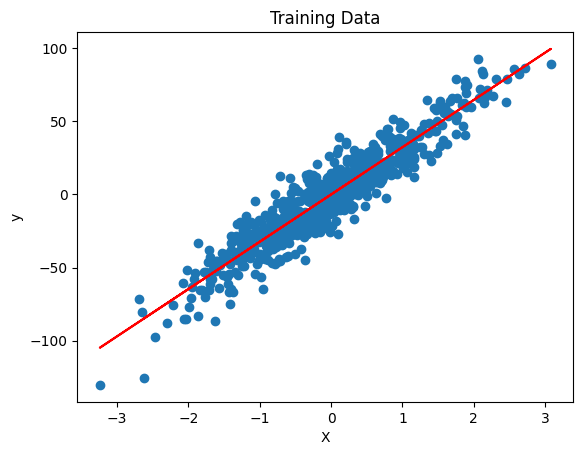

In [11]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

Let us also see how it looks on the test data.

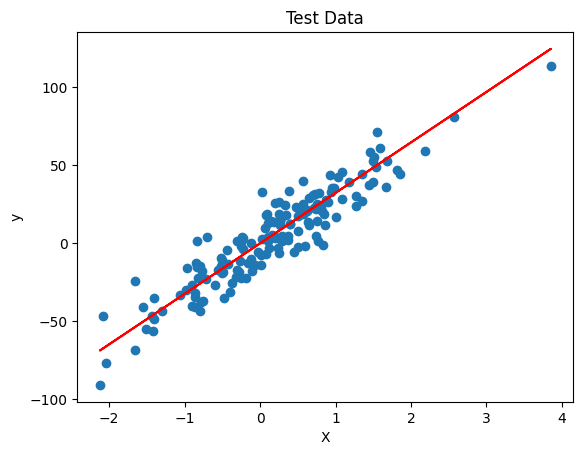

In [12]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test Data')
plt.show()

### Predict for any input value
You can give any value of X and ask the model to predict a value for your input.

In [13]:
model.predict([[2.2]])

array([71.06646562])

### Evaluate the model
You would want to see how well the model performs on the test data right? To check the efficiency of your regression model, the most common metric would be `RMSE`.

`RMSE` is not robust with ouliers, so we could also look into `MAE` (mean absolute error).

In [14]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}, MAE: {mae}')

RMSE: 11.418653522554465, MAE: 9.129294987872544


### How would you interpret these values?

- Low RMSE indicates that the model fits the data well and has more precise predictions.
- Low MAE would mean better prediction capability of the model. MAE value of 0 means the model has a perfect prediction.